In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('F1_2023/F1_2023.csv',encoding='latin-1')
sprint = pd.read_csv('F1_2023/Sprint_2023.csv',encoding='latin-1')

In [159]:
df.head()

,Driver,Constructor,BRN,SAU,AUS,AZB,MIA,MON,ESP,CAN,...,NED,ITA2,SIN,JPN,QAT,USA,MEX,BRA,LAS,ARE
0,Verstappen,Red Bull,25.0,19.0,25.0,24.0,26.0,25.0,26.0,25.0,...,25.0,25.0,10.0,26.0,33.0,33.0,25.0,33.0,25.0,26.0
1,Pérez,Red Bull,18.0,25.0,11.0,33.0,18.0,0.0,12.0,9.0,...,12.0,18.0,4.0,0.0,1.0,16.0,0.0,18.0,15.0,12.0
2,Hamilton,Mercedes,10.0,10.0,18.0,10.0,8.0,13.0,18.0,15.0,...,8.0,8.0,16.0,10.0,4.0,7.0,19.0,6.0,6.0,2.0
3,Alonso,Aston Martin,15.0,15.0,15.0,15.0,15.0,18.0,6.0,18.0,...,19.0,2.0,0.0,4.0,9.0,0.0,0.0,15.0,2.0,6.0
4,Leclerc,Ferrari,0.0,6.0,0.0,22.0,6.0,8.0,0.0,12.0,...,0.0,12.0,12.0,12.0,10.0,6.0,15.0,4.0,18.0,18.0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Driver       22 non-null     object 
 1   Constructor  22 non-null     object 
 2   BRN          20 non-null     float64
 3   SAU          20 non-null     float64
 4   AUS          20 non-null     float64
 5   AZB          20 non-null     float64
 6   MIA          20 non-null     float64
 7   MON          20 non-null     float64
 8   ESP          20 non-null     float64
 9   CAN          20 non-null     float64
 10  AUT          20 non-null     float64
 11  GBR          20 non-null     float64
 12  HUN          20 non-null     float64
 13  BEL          20 non-null     float64
 14  NED          20 non-null     float64
 15  ITA2         20 non-null     float64
 16  SIN          20 non-null     float64
 17  JPN          20 non-null     float64
 18  QAT          20 non-null     float64
 19  USA       

Now, we will check the first few entries of the sprint race data.

In [161]:
sprint.head()

,Name,Constructor,AZB,AUT,BEL,QAT,USA,BRA
0,Verstappen,Red Bull,6.0,8.0,8.0,7.0,8.0,8.0
1,Pérez,Red Bull,8.0,7.0,0.0,0.0,4.0,6.0
2,Hamilton,Mercedes,2.0,0.0,2.0,4.0,7.0,2.0
3,Alonso,Aston Martin,3.0,4.0,0.0,1.0,0.0,0.0
4,Sainz,Ferrari,4.0,6.0,5.0,3.0,3.0,1.0


Since sprint races are a new feature that have been added since the 2022 season, not all the race weekends have a sprint race. Therefore, resulting in lesser number of columns in this dataset.

In [162]:
sprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         22 non-null     object 
 1   Constructor  22 non-null     object 
 2   AZB          20 non-null     float64
 3   AUT          20 non-null     float64
 4   BEL          20 non-null     float64
 5   QAT          20 non-null     float64
 6   USA          20 non-null     float64
 7   BRA          20 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.5+ KB


Text(0.5, 0.98, 'Driver Points 2023 Championship')

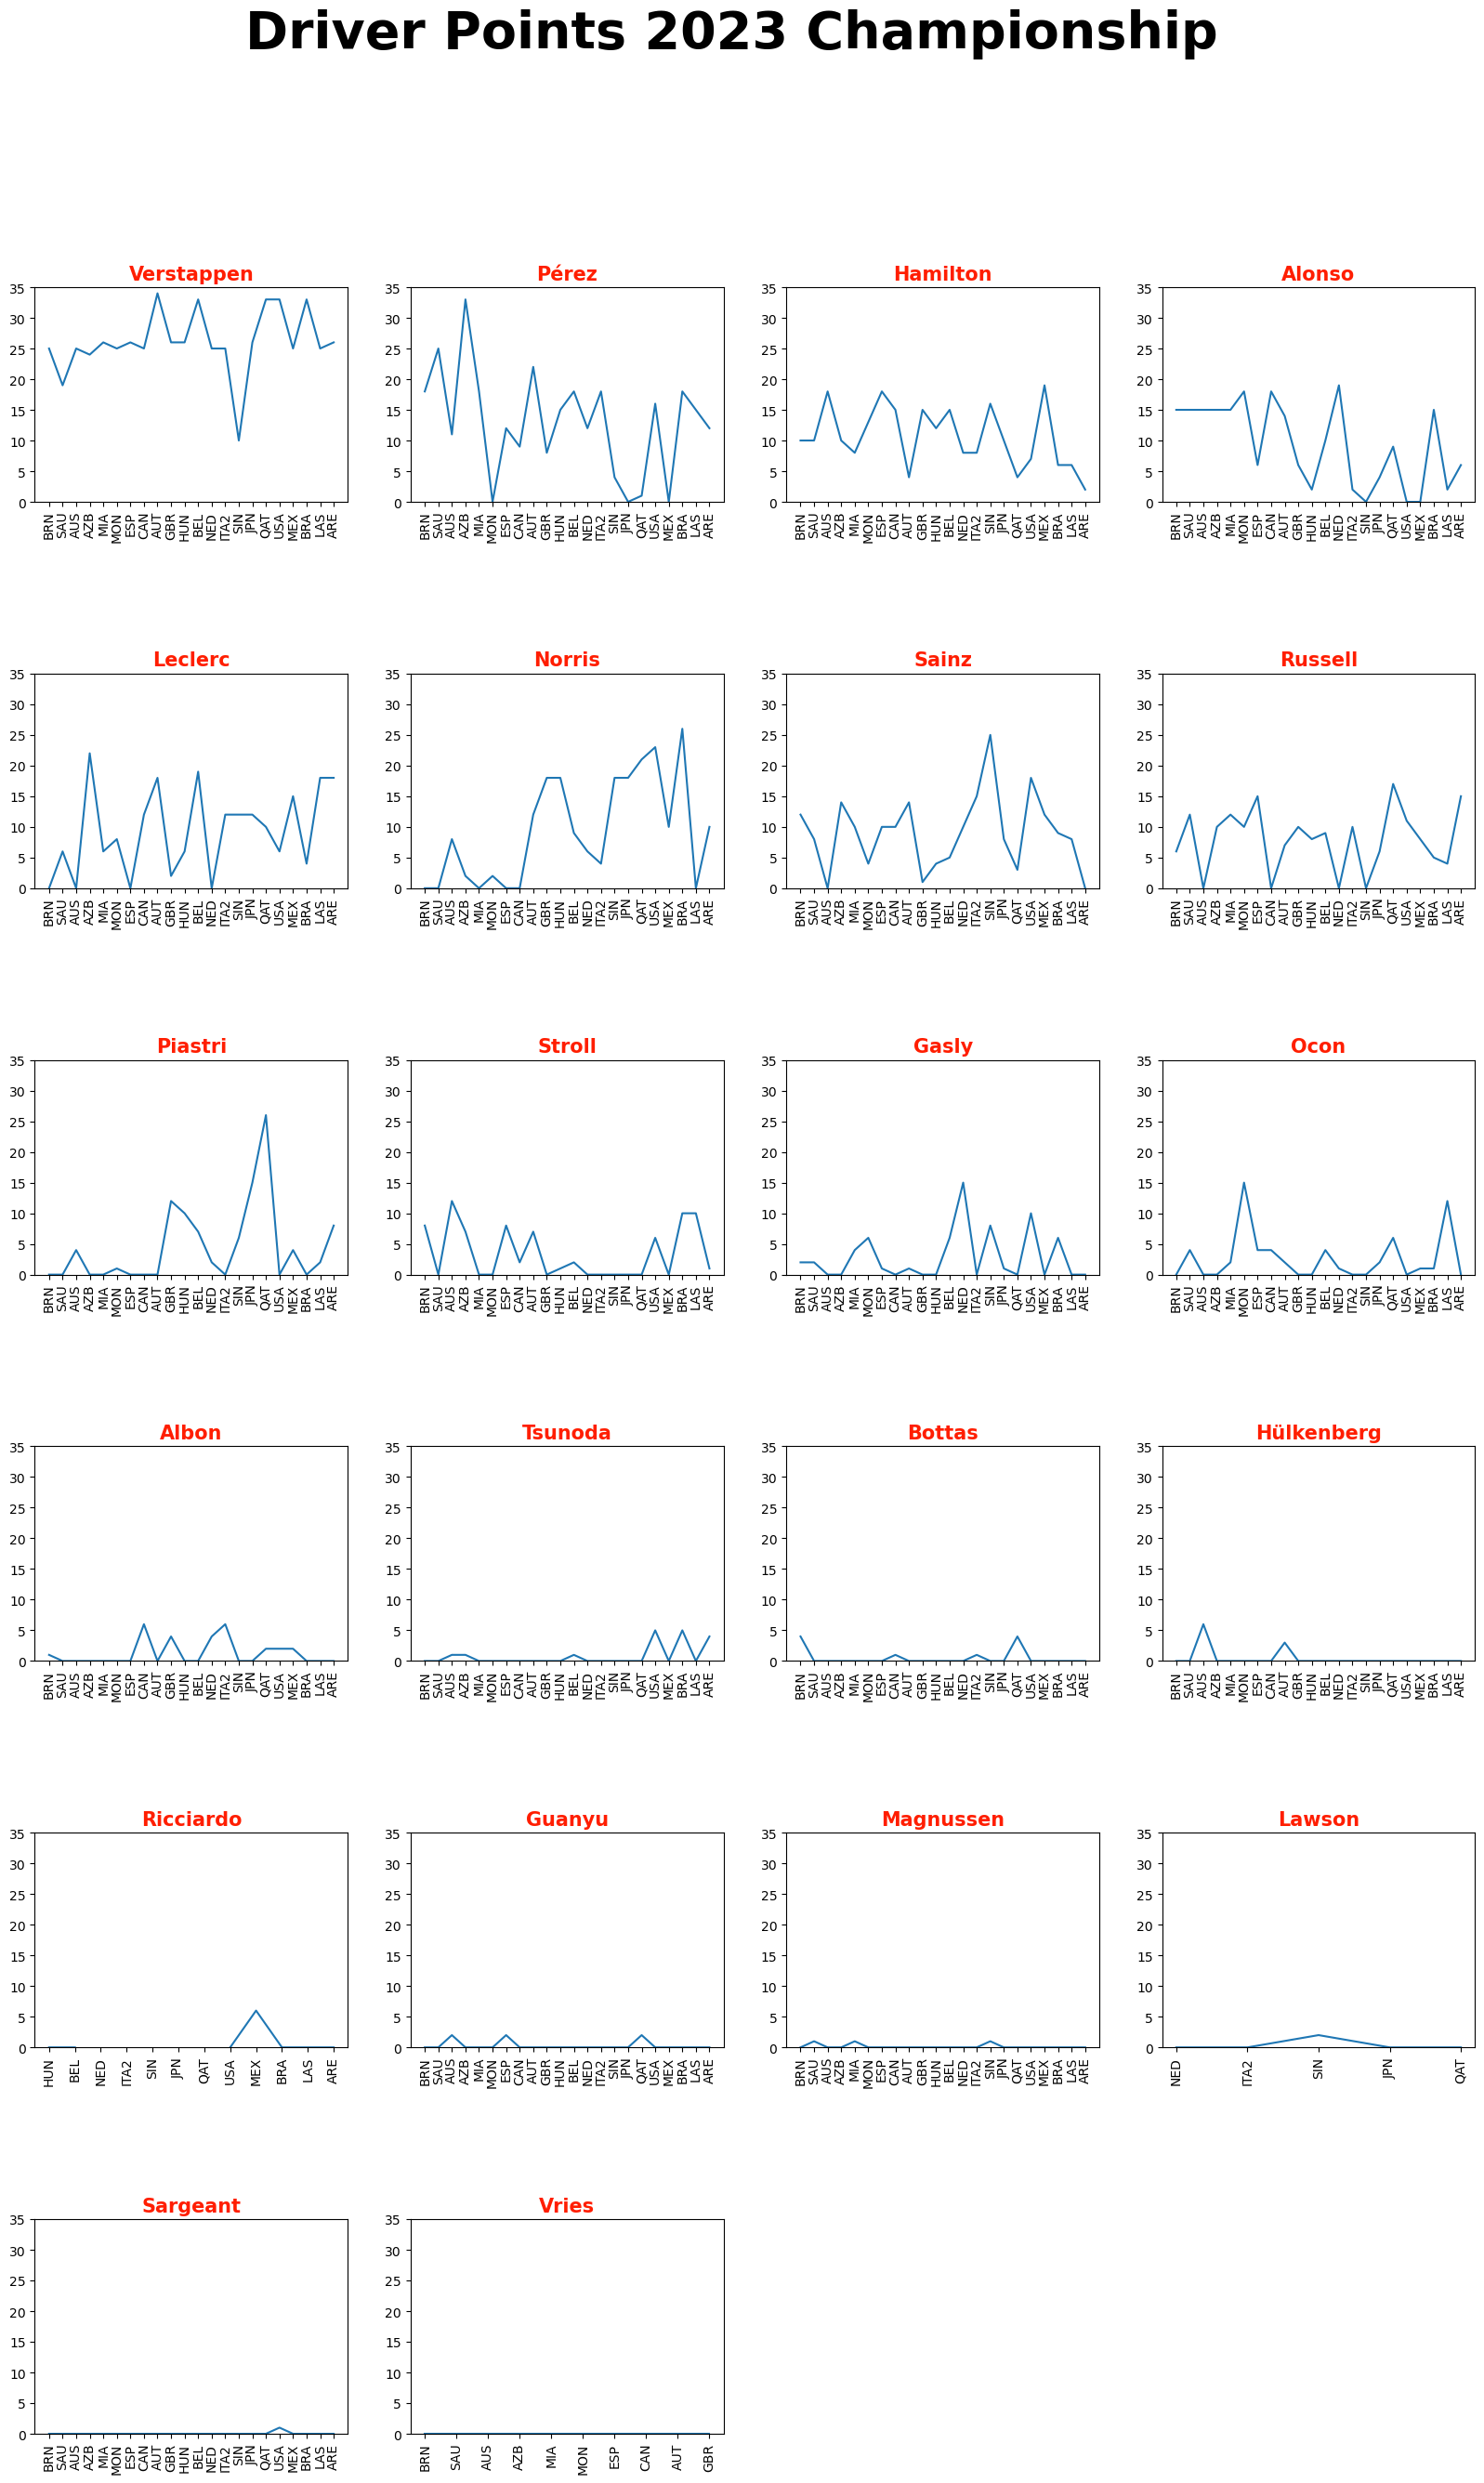

In [163]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.8)
races = df["Driver"]

for i, col in enumerate(races):
    
    ax = plt.subplot(6, 4, i+1)
    ax.plot(df.iloc[i, 2:])
    
    ax.set_title(df["Driver"][i], weight="bold", size="15", color='#FF1E00')
    
    custom_ylim = (0, 35)
    plt.setp(ax, ylim=custom_ylim)
    plt.xticks(rotation='vertical')
    
plt.suptitle("Driver Points 2023 Championship", weight="bold", size="40")

Text(0.5, 0.98, 'Driver Sprint Points 2023 Championship')

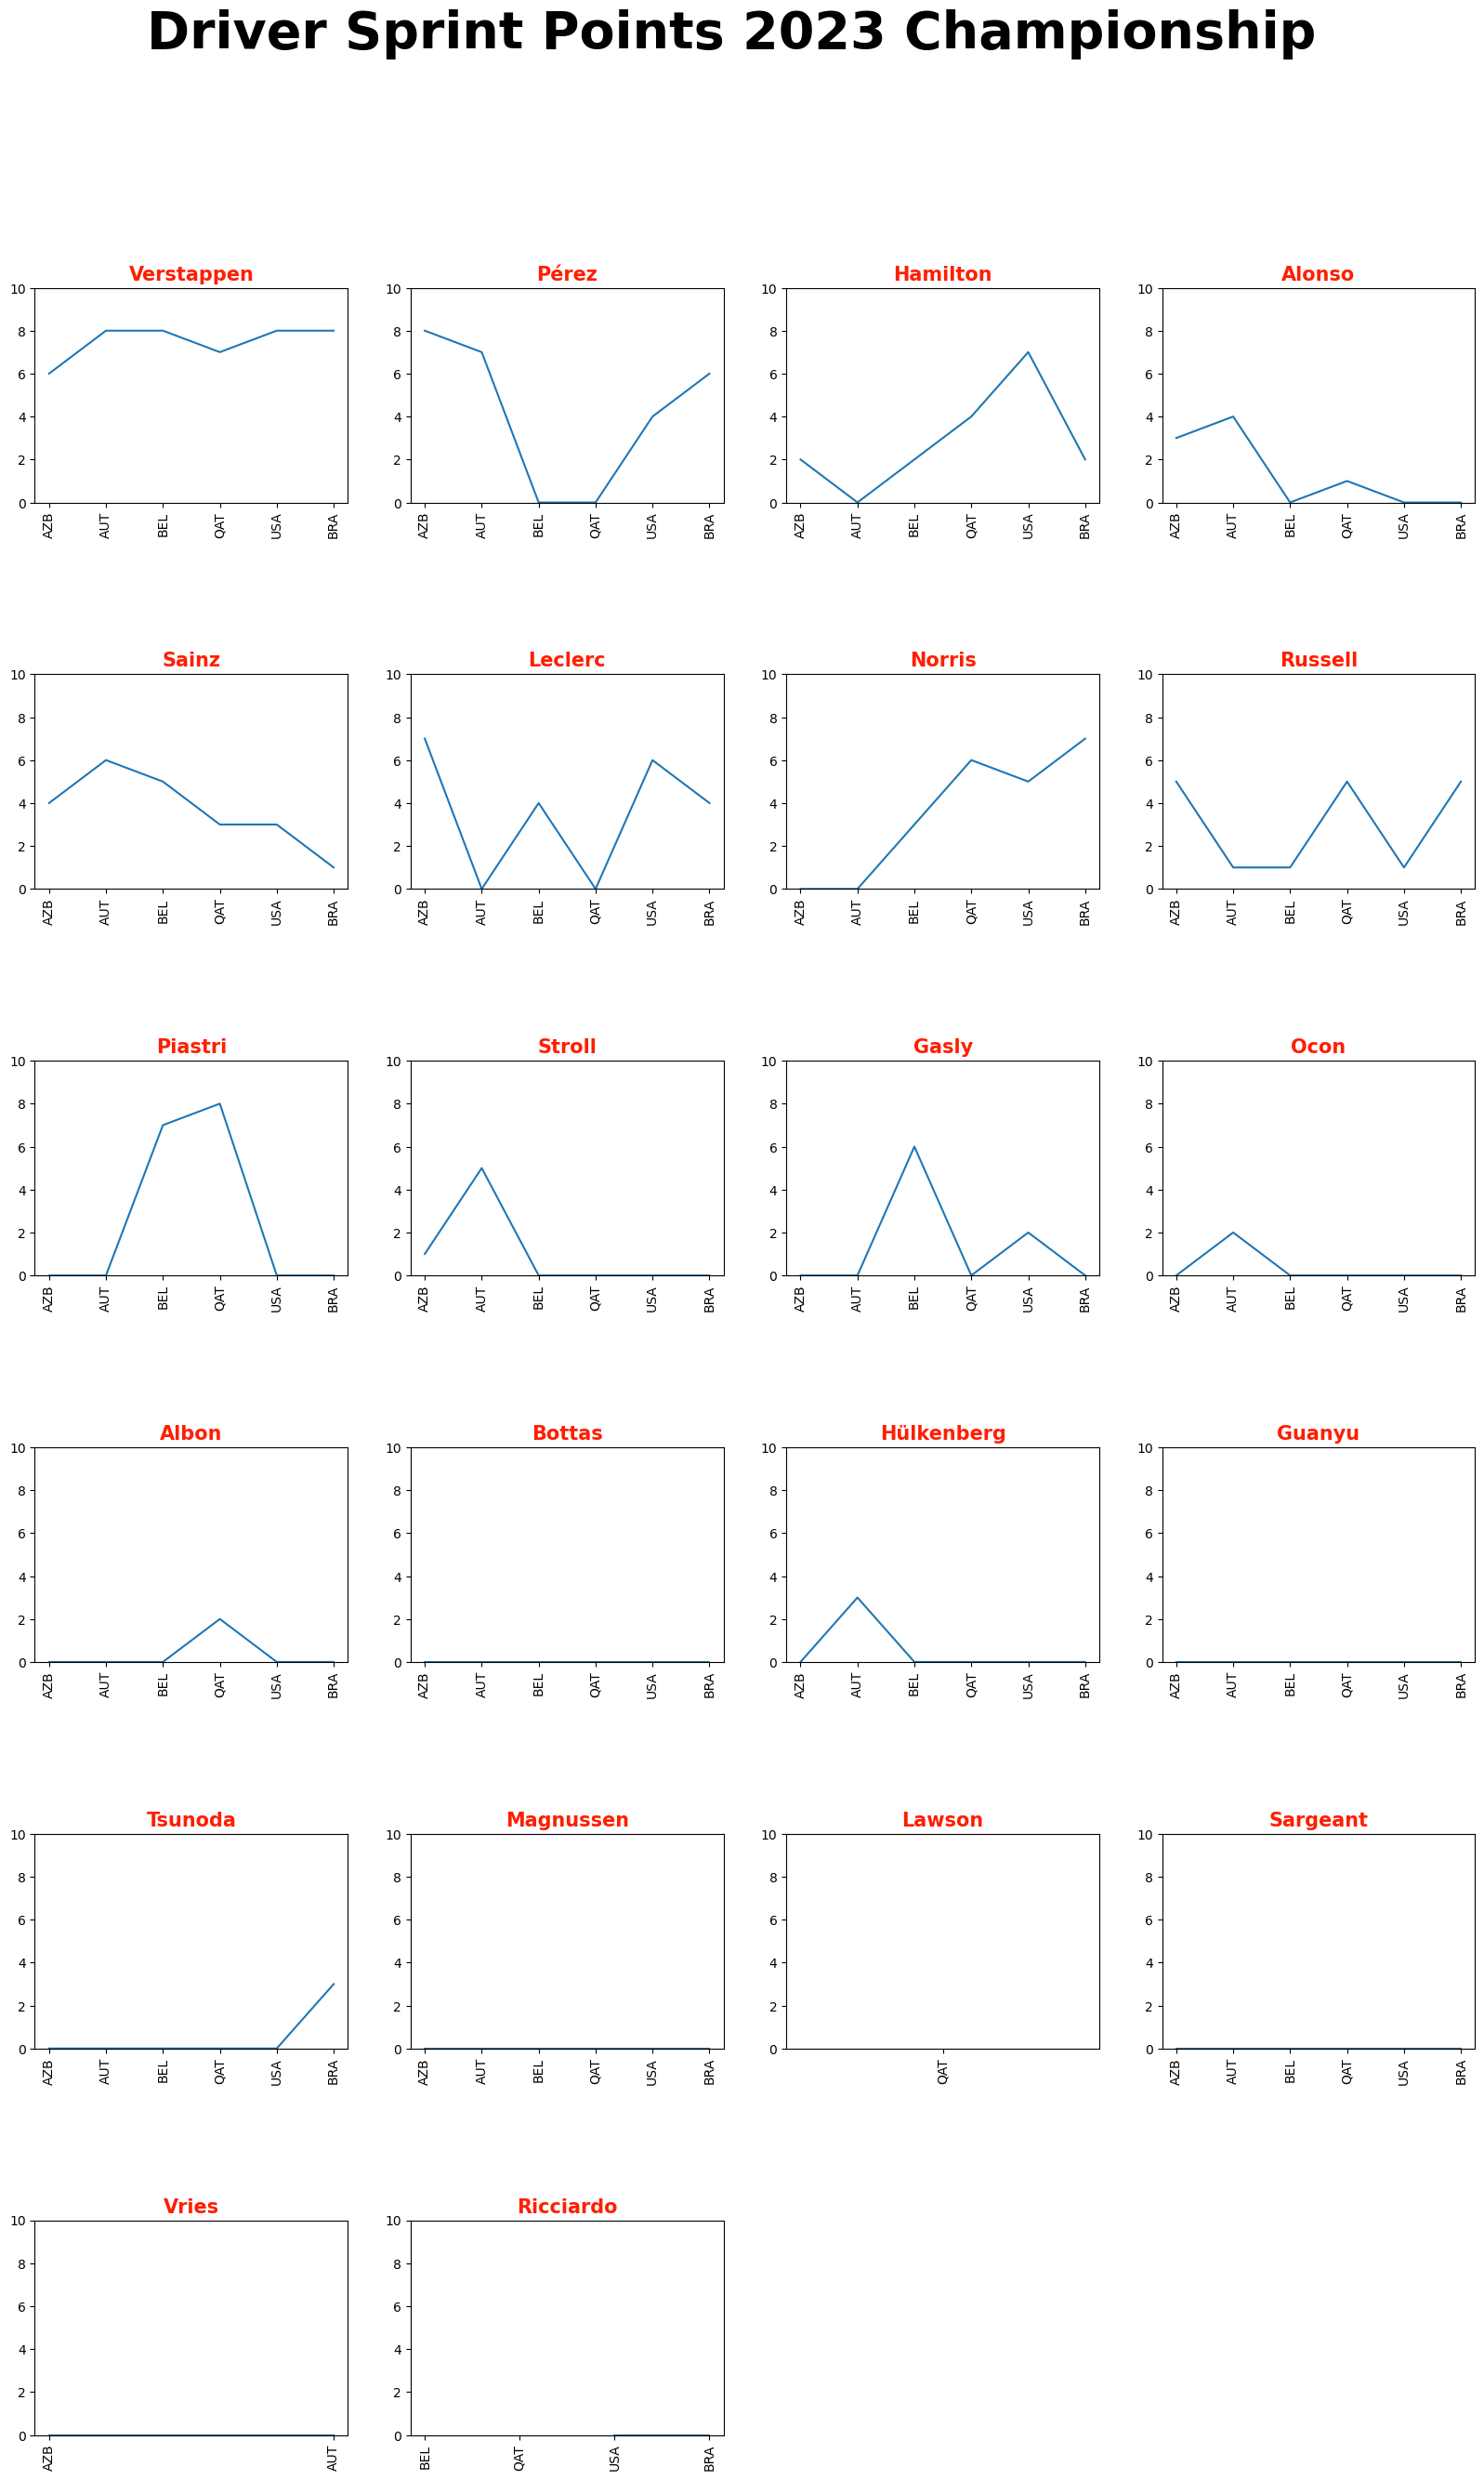

In [164]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.8)
races = sprint["Name"]

for i, col in enumerate(races):
    
    ax = plt.subplot(6, 4, i+1)
    ax.plot(sprint.iloc[i, 2:])
    
    ax.set_title(sprint["Name"][i], weight="bold", size="15", color='#FF1E00')
    
    custom_ylim = (0, 10)
    plt.setp(ax, ylim=custom_ylim)
    plt.xticks(rotation='vertical')
    
plt.suptitle("Driver Sprint Points 2023 Championship", weight="bold", size="40")

In [179]:
constructors = pd.DataFrame(df.groupby("Constructor").sum())
constructors.reset_index(drop=False, inplace=True)
constructors=constructors.drop('Driver',axis=1)
constructors['Total']=constructors.drop('Constructor', axis=1)[0:].sum(axis=1)
constructors=constructors.sort_values(by='Total',ascending=False)
constructors=constructors.reset_index().drop(['index','Total'],axis=1)

In [228]:
constructors.head(10)

,Constructor,BRN,SAU,AUS,AZB,MIA,MON,ESP,CAN,AUT,...,NED,ITA2,SIN,JPN,QAT,USA,MEX,BRA,LAS,ARE
0,Red Bull,43.0,44.0,36.0,57.0,44.0,25.0,38.0,34.0,56.0,...,37.0,43.0,14.0,26.0,34.0,49.0,25.0,51.0,40.0,38.0
1,Mercedes,16.0,22.0,18.0,20.0,20.0,23.0,33.0,15.0,11.0,...,8.0,18.0,16.0,16.0,21.0,18.0,27.0,11.0,10.0,17.0
2,Ferrari,12.0,14.0,0.0,36.0,16.0,12.0,10.0,22.0,32.0,...,10.0,27.0,37.0,20.0,13.0,24.0,27.0,13.0,26.0,18.0
3,McLaren,0.0,0.0,12.0,2.0,0.0,3.0,0.0,0.0,12.0,...,8.0,4.0,24.0,33.0,47.0,23.0,14.0,26.0,2.0,18.0
4,Aston Martin,23.0,15.0,27.0,22.0,15.0,18.0,14.0,20.0,21.0,...,19.0,2.0,0.0,4.0,9.0,6.0,0.0,25.0,12.0,7.0
5,Alpine,2.0,6.0,0.0,0.0,6.0,21.0,5.0,4.0,3.0,...,16.0,0.0,8.0,3.0,6.0,10.0,1.0,7.0,12.0,0.0
6,Williams,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,4.0,6.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
7,AlphaTauri,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,5.0,6.0,5.0,0.0,4.0
8,Alfa Romeo,4.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
9,Haas,0.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0.98, 'Driver Sprint Points 2023 Championship')

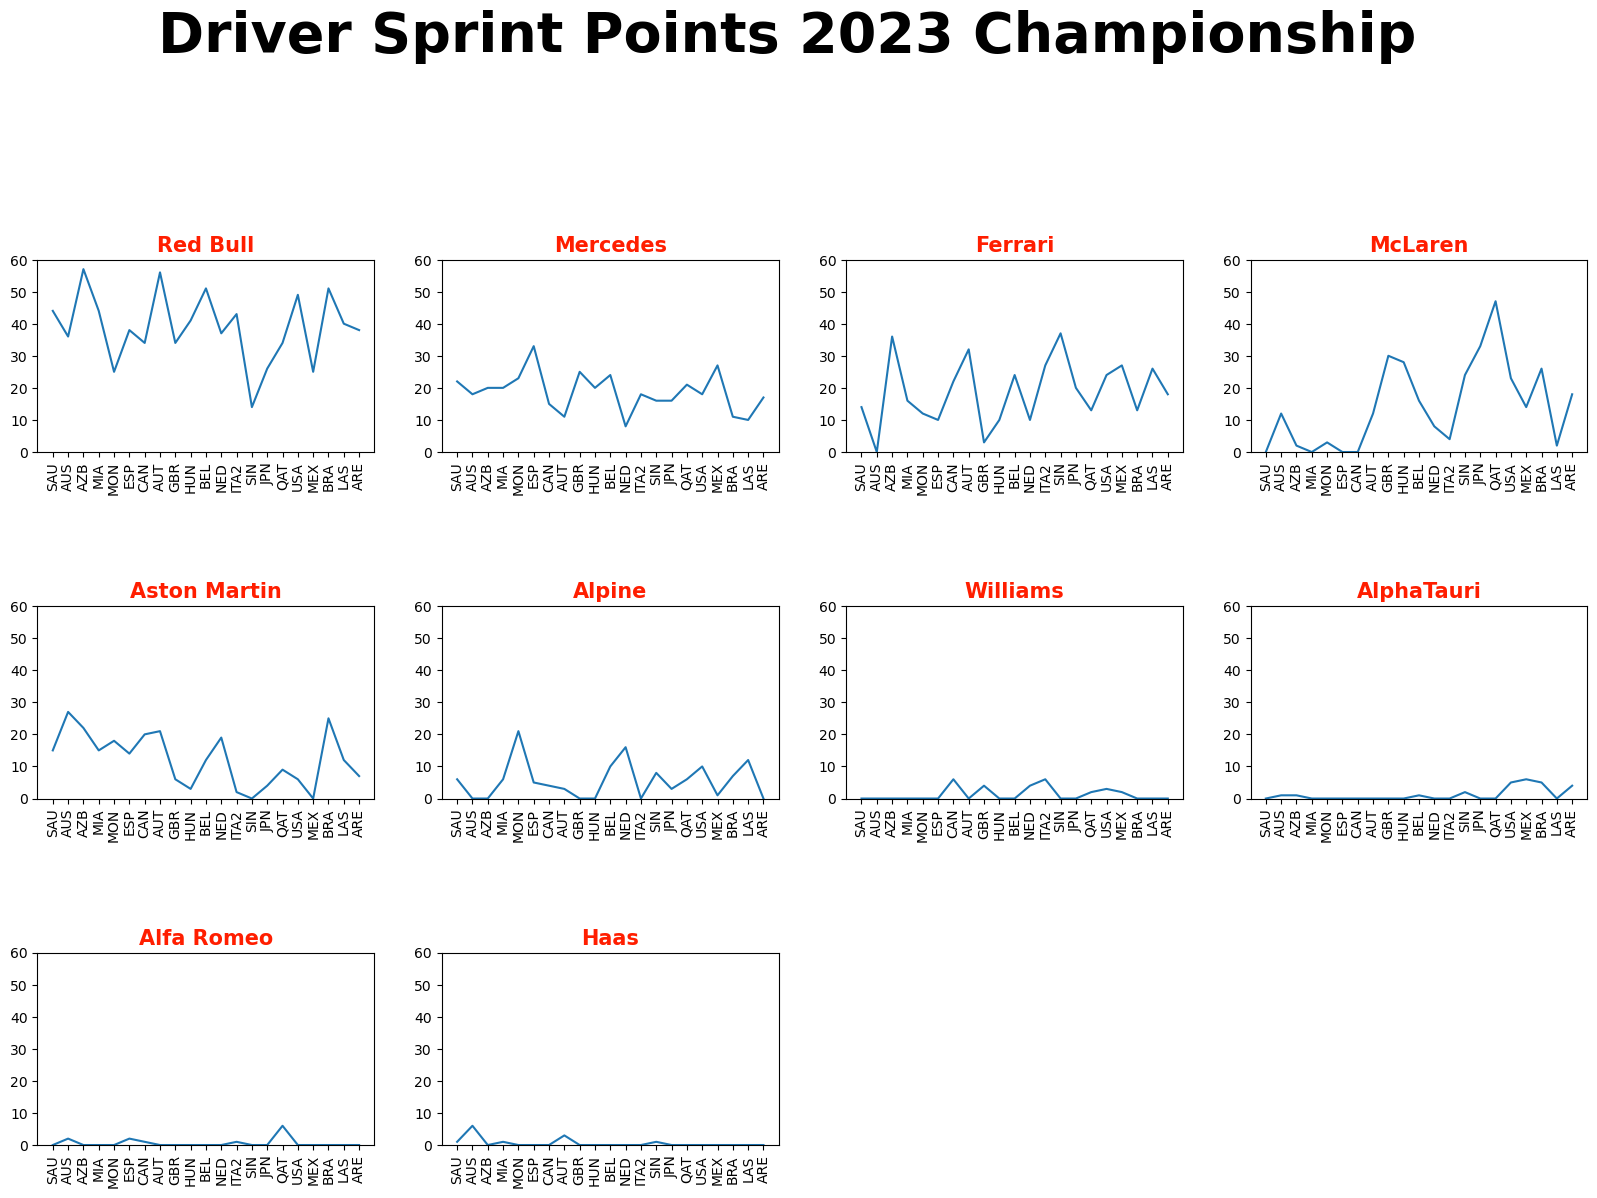

In [187]:
plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.8)
Constructors = constructors["Constructor"]

for i, col in enumerate(Constructors):
    
    ax = plt.subplot(6, 4, i+1)
    ax.plot(constructors.iloc[i, 2:])
    
    ax.set_title(Constructors[i], weight="bold", size="15", color='#FF1E00')
    
    custom_ylim = (0, 60)
    plt.setp(ax, ylim=custom_ylim)
    plt.xticks(rotation='vertical')
    
plt.suptitle("Driver Sprint Points 2023 Championship", weight="bold", size="40")

In [190]:
driver_cumulative = df.iloc[:, 2:].cumsum(axis=1)
driver_name = df['Driver']
driver_cumulative.insert(0, 'Name', driver_name)

In [191]:
driver_cumulative.head()

,Name,BRN,SAU,AUS,AZB,MIA,MON,ESP,CAN,AUT,...,NED,ITA2,SIN,JPN,QAT,USA,MEX,BRA,LAS,ARE
0,Verstappen,25.0,44.0,69.0,93.0,119.0,144.0,170.0,195.0,229.0,...,339.0,364.0,374.0,400.0,433.0,466.0,491.0,524.0,549.0,575.0
1,Pérez,18.0,43.0,54.0,87.0,105.0,105.0,117.0,126.0,148.0,...,201.0,219.0,223.0,223.0,224.0,240.0,240.0,258.0,273.0,285.0
2,Hamilton,10.0,20.0,38.0,48.0,56.0,69.0,87.0,102.0,106.0,...,156.0,164.0,180.0,190.0,194.0,201.0,220.0,226.0,232.0,234.0
3,Alonso,15.0,30.0,45.0,60.0,75.0,93.0,99.0,117.0,131.0,...,168.0,170.0,170.0,174.0,183.0,183.0,183.0,198.0,200.0,206.0
4,Leclerc,0.0,6.0,6.0,28.0,34.0,42.0,42.0,54.0,72.0,...,99.0,111.0,123.0,135.0,145.0,151.0,166.0,170.0,188.0,206.0


Text(0, 0.5, 'Total Points')

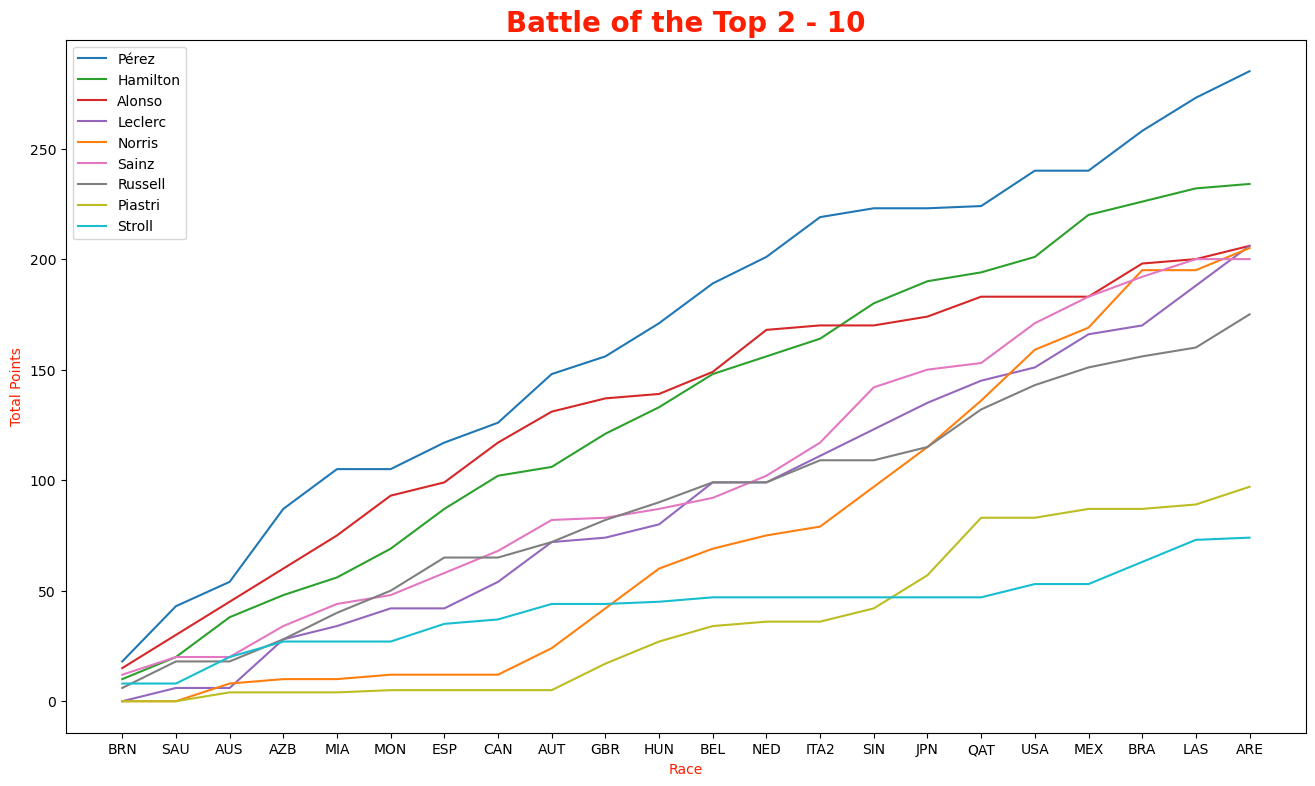

In [270]:
colors = ['red',"#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#ff7f0e", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(16, 9))

for i in range(1, 10):
    color = colors[i]
    plt.plot(driver_cumulative.iloc[i, 1:], color=color)
    plt.legend(driver_cumulative["Name"][1:10])
    plt.title("Battle of the Top 2 - 10", weight="bold", size="20", color='#FF1E00')

plt.xlabel('Race',color='#FF1E00')
plt.ylabel('Total Points',color='#FF1E00')

In [229]:
constructors.head(10)

,Constructor,BRN,SAU,AUS,AZB,MIA,MON,ESP,CAN,AUT,...,NED,ITA2,SIN,JPN,QAT,USA,MEX,BRA,LAS,ARE
0,Red Bull,43.0,44.0,36.0,57.0,44.0,25.0,38.0,34.0,56.0,...,37.0,43.0,14.0,26.0,34.0,49.0,25.0,51.0,40.0,38.0
1,Mercedes,16.0,22.0,18.0,20.0,20.0,23.0,33.0,15.0,11.0,...,8.0,18.0,16.0,16.0,21.0,18.0,27.0,11.0,10.0,17.0
2,Ferrari,12.0,14.0,0.0,36.0,16.0,12.0,10.0,22.0,32.0,...,10.0,27.0,37.0,20.0,13.0,24.0,27.0,13.0,26.0,18.0
3,McLaren,0.0,0.0,12.0,2.0,0.0,3.0,0.0,0.0,12.0,...,8.0,4.0,24.0,33.0,47.0,23.0,14.0,26.0,2.0,18.0
4,Aston Martin,23.0,15.0,27.0,22.0,15.0,18.0,14.0,20.0,21.0,...,19.0,2.0,0.0,4.0,9.0,6.0,0.0,25.0,12.0,7.0
5,Alpine,2.0,6.0,0.0,0.0,6.0,21.0,5.0,4.0,3.0,...,16.0,0.0,8.0,3.0,6.0,10.0,1.0,7.0,12.0,0.0
6,Williams,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,4.0,6.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
7,AlphaTauri,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,5.0,6.0,5.0,0.0,4.0
8,Alfa Romeo,4.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
9,Haas,0.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
team_cumulative = constructors.iloc[:, 2:].cumsum(axis=1)
team_name = constructors['Constructor']
team_cumulative.insert(0, 'Team', team_name)
team_cumulative.head(10)

,Team,SAU,AUS,AZB,MIA,MON,ESP,CAN,AUT,GBR,...,NED,ITA2,SIN,JPN,QAT,USA,MEX,BRA,LAS,ARE
0,Red Bull,44.0,80.0,137.0,181.0,206.0,244.0,278.0,334.0,368.0,...,497.0,540.0,554.0,580.0,614.0,663.0,688.0,739.0,779.0,817.0
1,Mercedes,22.0,40.0,60.0,80.0,103.0,136.0,151.0,162.0,187.0,...,239.0,257.0,273.0,289.0,310.0,328.0,355.0,366.0,376.0,393.0
2,Ferrari,14.0,14.0,50.0,66.0,78.0,88.0,110.0,142.0,145.0,...,189.0,216.0,253.0,273.0,286.0,310.0,337.0,350.0,376.0,394.0
3,McLaren,0.0,12.0,14.0,14.0,17.0,17.0,17.0,29.0,59.0,...,111.0,115.0,139.0,172.0,219.0,242.0,256.0,282.0,284.0,302.0
4,Aston Martin,15.0,42.0,64.0,79.0,97.0,111.0,131.0,152.0,158.0,...,192.0,194.0,194.0,198.0,207.0,213.0,213.0,238.0,250.0,257.0
5,Alpine,6.0,6.0,6.0,12.0,33.0,38.0,42.0,45.0,45.0,...,71.0,71.0,79.0,82.0,88.0,98.0,99.0,106.0,118.0,118.0
6,Williams,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,10.0,...,14.0,20.0,20.0,20.0,22.0,25.0,27.0,27.0,27.0,27.0
7,AlphaTauri,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,5.0,5.0,5.0,10.0,16.0,21.0,21.0,25.0
8,Alfa Romeo,0.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,5.0,...,5.0,6.0,6.0,6.0,12.0,12.0,12.0,12.0,12.0,12.0
9,Haas,1.0,7.0,7.0,8.0,8.0,8.0,8.0,11.0,11.0,...,11.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0


Text(0.5, 0, 'Race')

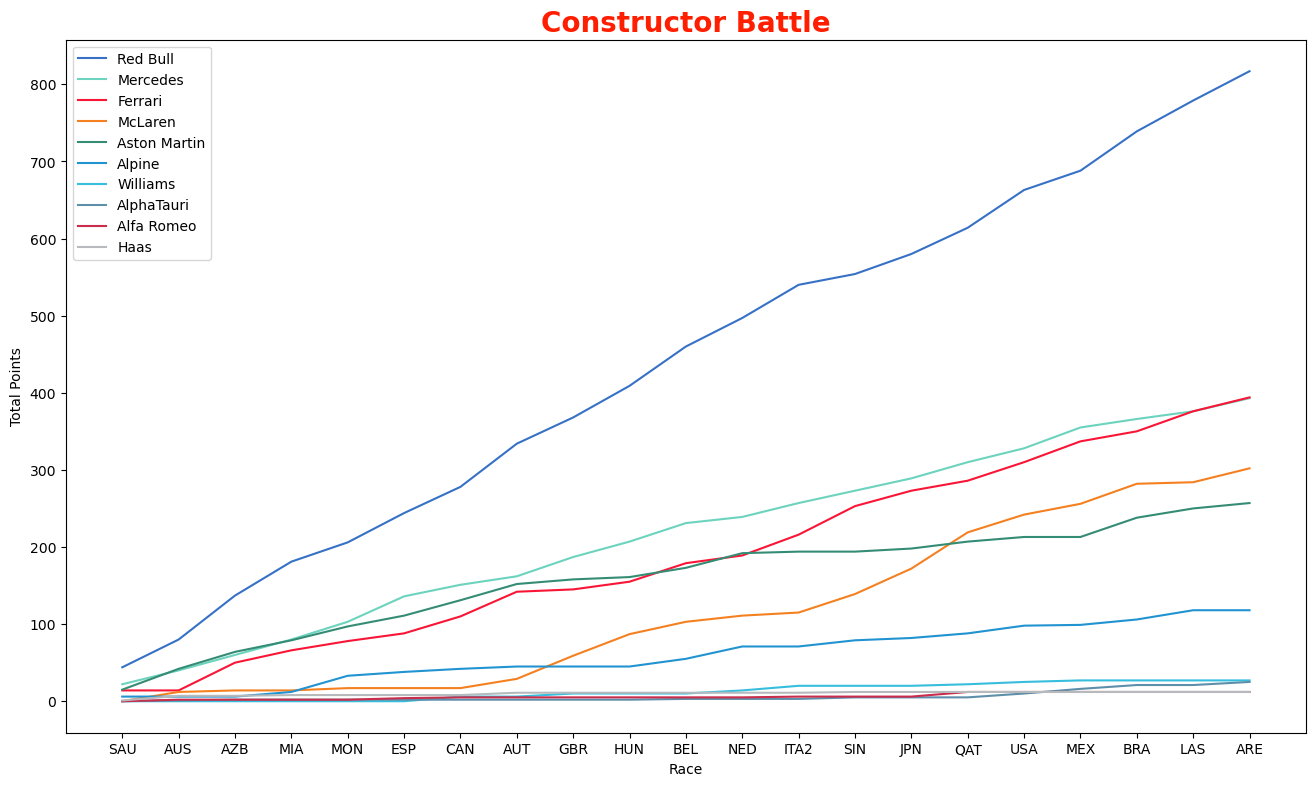

In [271]:
colors = ['#3671C6',"#6CD3BF", "#F91536", "#F58020", "#358C75", "#2293D1", "#37BEDD", "#5E8FAA", "#C92D4B", "#B6BABD"]

plt.figure(figsize=(16, 9))

for i in range(0, 10):
    color = colors[i]
    plt.plot(team_cumulative.iloc[i, 1:], color=color)
    plt.legend(team_cumulative["Team"][0:10])
    plt.title("Constructor Battle", weight="bold", size="20", color='#FF1E00')
plt.ylabel('Total Points')
plt.xlabel('Race')

Text(0.5, 0.98, 'Teammate Contribution to Constructor Points')

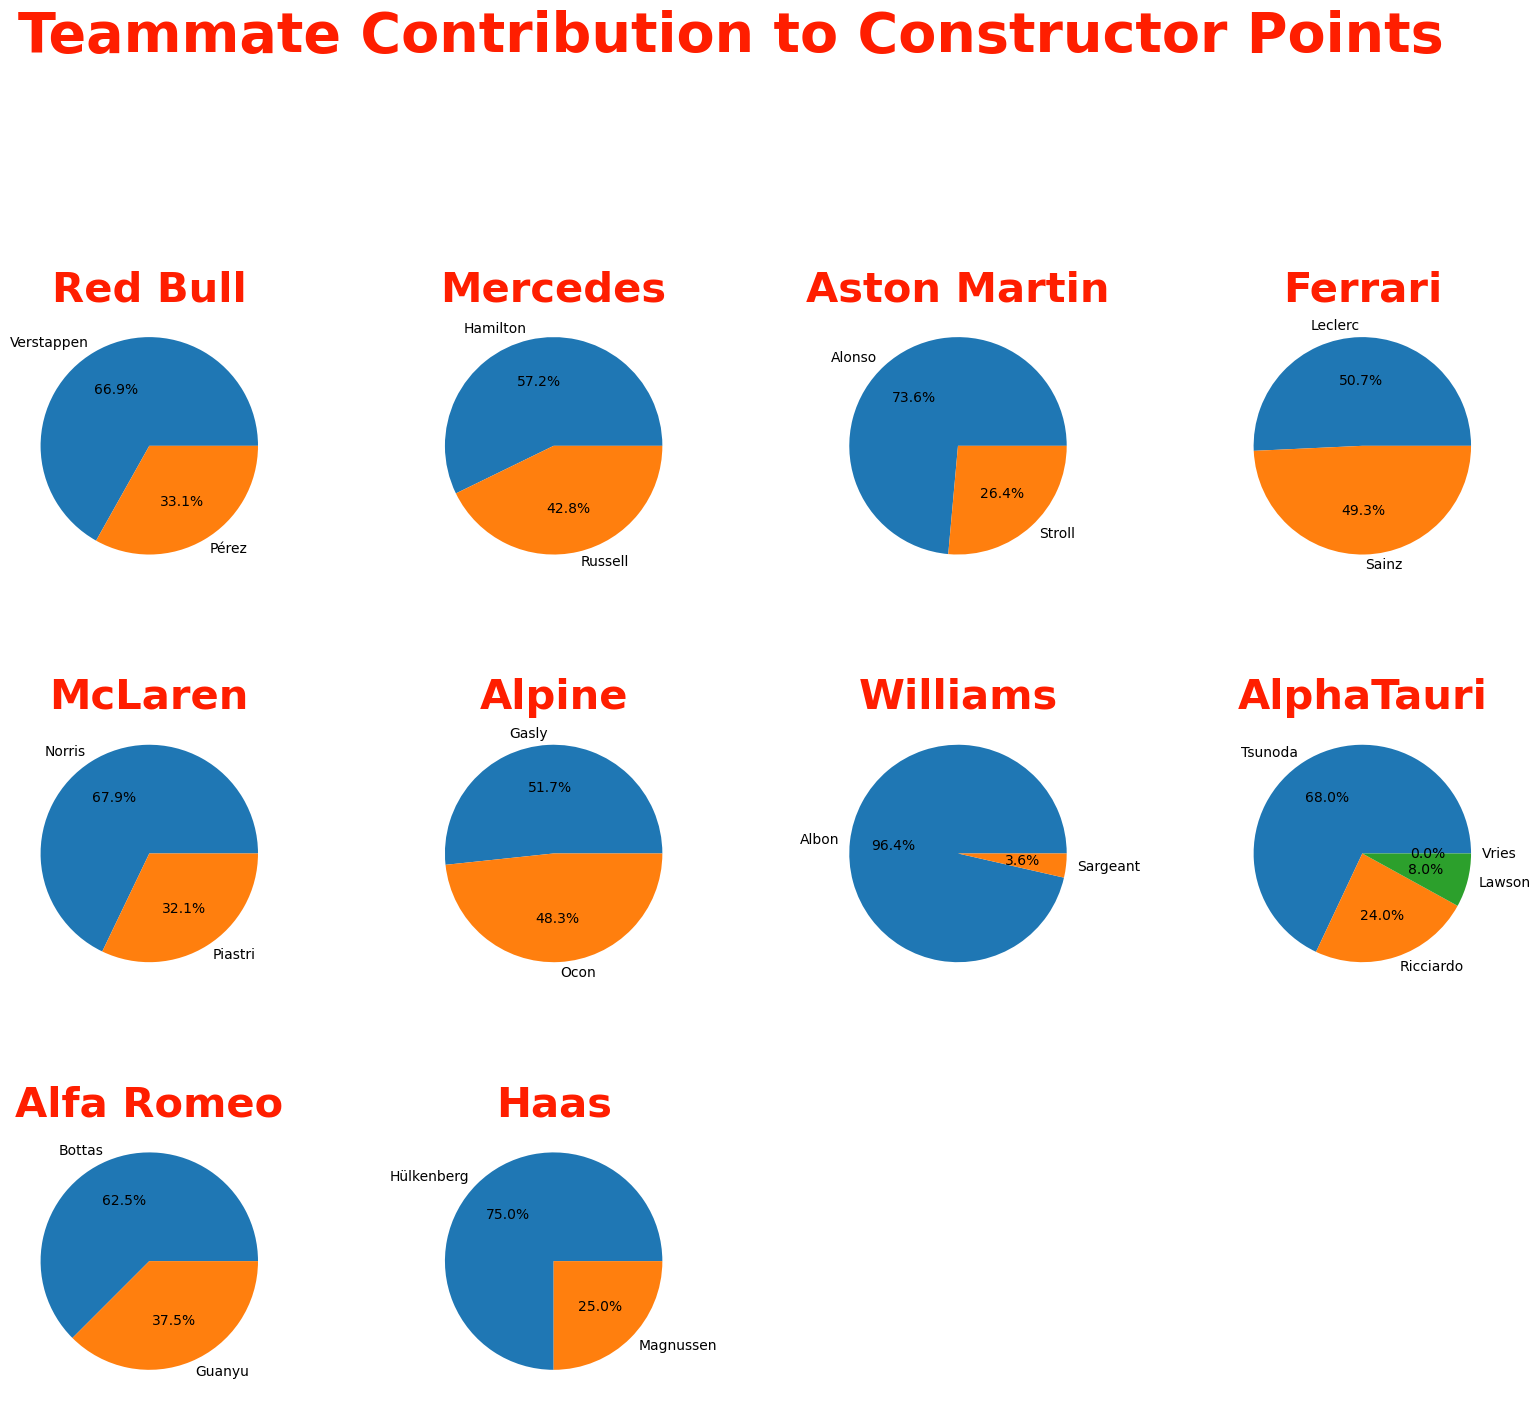

In [265]:
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
for i in range (10):

    ax = plt.subplot(6, 4, i+1)

    pair = df[df['Constructor'] == df['Constructor'].unique()[i]]
    pair_points=pair.drop('Driver',axis=1).drop('Constructor',axis=1)
    sum1 = pair_points[0:].sum(axis=1)
    ax.pie(sum1, labels=pair['Driver'], autopct='%1.1f%%')

    ax.set_title(df["Constructor"].unique()[i], weight="bold", size="30", color='#FF1E00')
        
plt.suptitle("Teammate Contribution to Constructor Points", weight="bold", size="40", color='#FF1E00')